In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("salaries.csv")
df

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


In [17]:
y = df["salary_more_then_100k"]
y

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

In [27]:
input_df = df.drop("salary_more_then_100k",axis=1)
input_df

,company,job,degree
0,google,sales executive,bachelors
1,google,sales executive,masters
2,google,business manager,bachelors
3,google,business manager,masters
4,google,computer programmer,bachelors
5,google,computer programmer,masters
6,abc pharma,sales executive,masters
7,abc pharma,computer programmer,bachelors
8,abc pharma,business manager,bachelors
9,abc pharma,business manager,masters


In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
le_company = LabelEncoder()

In [30]:
dfle_company = le_company.fit_transform(df.company)

In [31]:
dfle_company

array([2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [35]:
input_df["company_n"] = le_company.fit_transform(input_df.company)

In [36]:
input_df

,company,job,degree,company_n
0,google,sales executive,bachelors,2
1,google,sales executive,masters,2
2,google,business manager,bachelors,2
3,google,business manager,masters,2
4,google,computer programmer,bachelors,2
5,google,computer programmer,masters,2
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,0


In [38]:
le_job = LabelEncoder()
le_degree = LabelEncoder()

In [40]:
input_df["job_n"] = le_job.fit_transform(input_df.job)
input_df["degree_n"] = le_degree.fit_transform(input_df.degree)

In [51]:
input_df

,company,job,degree,company_n,job_n,degree_n
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0
5,google,computer programmer,masters,2,1,1
6,abc pharma,sales executive,masters,0,2,1
7,abc pharma,computer programmer,bachelors,0,1,0
8,abc pharma,business manager,bachelors,0,0,0
9,abc pharma,business manager,masters,0,0,1


In [52]:
X = input_df.drop(["company","job","degree"],axis = 1)

In [53]:
X

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [59]:
from sklearn import tree

In [66]:
model = tree.DecisionTreeClassifier()

In [67]:
model.fit(X,y)

DecisionTreeClassifier()

In [70]:
df.company

0         google
1         google
2         google
3         google
4         google
5         google
6     abc pharma
7     abc pharma
8     abc pharma
9     abc pharma
10      facebook
11      facebook
12      facebook
13      facebook
14      facebook
15      facebook
Name: company, dtype: object

In [72]:
X.company_n

0     2
1     2
2     2
3     2
4     2
5     2
6     0
7     0
8     0
9     0
10    1
11    1
12    1
13    1
14    1
15    1
Name: company_n, dtype: int32

In [76]:
model.predict([[2,1,0]])

array([0], dtype=int64)

# Using Train Text Split

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [79]:
from sklearn import tree

In [85]:
my_model = tree.DecisionTreeClassifier()

In [86]:
my_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [94]:
my_model.predict(X_test)

array([0, 1, 0, 0], dtype=int64)

In [98]:
model.score(X_test,y_test)

1.0

In [99]:
from sklearn.metrics import confusion_matrix

In [100]:
predicted = my_model.predict(X_test)
cm = confusion_matrix(y_test,predicted)

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Text(69.0, 0.5, 'Truth')

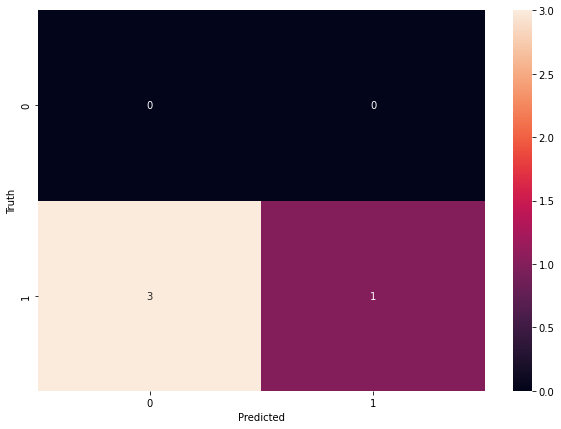

In [110]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')